In [1]:
# Import potentially useful dependencies.

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Import Python SQL toolkit and Object Relational Mapper INLCUDING inspect.

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect


In [3]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///hawaii.sqlite")


In [4]:
# Declare a base.

Base=automap_base()


In [5]:
# Reflect an existing database into a new model.
# Reflect the tables.

Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found.

Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table.

Measurement=Base.classes.measurement
Station=Base.classes.station


In [8]:
# Create our session (link) from Python to the DB.

session=Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Explore the features of the Measurement class by viewing the first row.

first_row=session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ae295c4ca0>,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01'}

In [10]:
# Explore further using 'INSPECT'. 

inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Find column types using 'INSPECT'.

columns=inspector.get_columns('measurement')
for column in columns:
        print (column["name"], column["type"])
        

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Find column types using 'INSPECT'.

columns=inspector.get_columns('station')
for column in columns:
        print (column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the total number of rows in the Measurements table.

number_of_rows = session.query(Measurement).\
    filter(Measurement.id).count()
print(f"There are {number_of_rows} rows in the Measurement table.")


There are 19550 rows in the Measurement table.


In [14]:
# Find the most recent row of data by date.

last_row_by_date = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).first()

print(f"{last_row_by_date}")


(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)


In [15]:
# Isolate the most recent date in the data set.

most_recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
last_date = dt.datetime.strptime(most_recent_date.date, '%Y-%m-%d').date()
last_date


datetime.date(2017, 8, 23)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Use the most recent data point in the database and everything dated within one year of that. 

# Calculate the date one year from the last date in data set.

starting_date = last_date - dt.timedelta(days=365)
starting_date


datetime.date(2016, 8, 23)

In [17]:
# Perform a query to retrieve the data and precipitation scores

Last_year_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= starting_date).\
    order_by(Measurement.date).all()

print(f"{Last_year_data[0:5]}")


[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02)]


In [18]:
# Save the query results as a Pandas DataFrame and set the index to the 'date' column.

Prcp_df = pd.DataFrame(Last_year_data, columns=['Date','Precipitation'])
Prcp_df


Date  Precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23            NaN
4     2016-08-23           0.02
...          ...            ...
2225  2017-08-22           0.50
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]

In [19]:
# Sort the dataframe by 'date'.

Prcp_sorted_df = Prcp_df.sort_values(["Date"], ascending=True)
Prcp_sorted_df = Prcp_df.set_index("Date")
Prcp_sorted_df.head(5)


Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02

In [20]:
# The NaN values in the data set may affect the summary statistics we will soon need to calculate. 
# The Pandas documentation suggests NANs are treated as zeros. Leaving them in the data will distort all findings.

Prcp_Cleaned_df = Prcp_sorted_df.dropna()

# Note: 2230 rows of data has now become 2021.


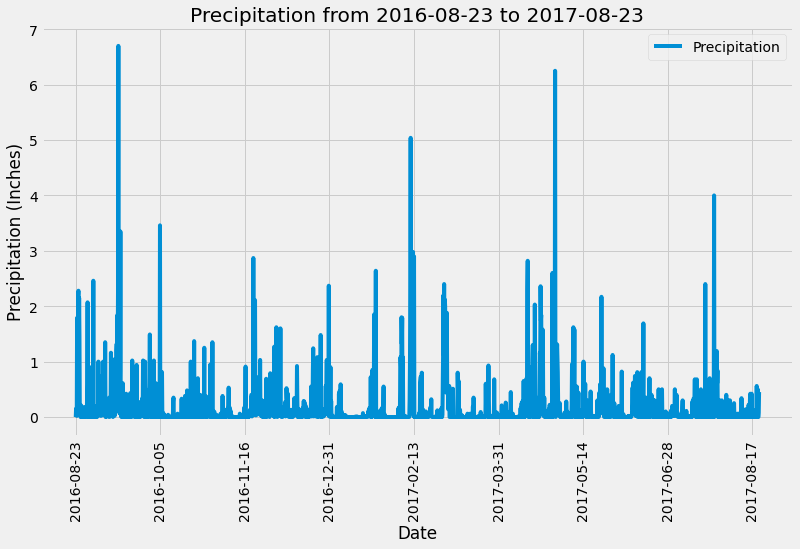

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

Prcp_Cleaned_df.plot(rot=90, figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title(f"Precipitation from {starting_date} to {last_date}")
plt.savefig("Precipitation_Bar_Chart.png")
plt.show()


In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data.

Prcp_Cleaned_df.describe()


Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [23]:
# Explore the Station table by printing the first row.

first_row=session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ae2cdd4760>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [24]:
# Design a query to calculate the total number stations in the dataset.

number_of_rows2 = session.query(Station).\
    filter(Station.id).count()

print(f"There are {number_of_rows2} stations listed in the table.")


There are 9 stations listed in the table.


In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_measurement_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Note, we look in the Measurement table, not the Stations table to find the activity.
# The Stations table gives info on each station, not the number of measurements it took.

station_measurement_counts


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# The most active station was USC00519281 with 2772 readings.
# Start by listing ALL of the temperature measurements made at ALL of the stations.

all_temp_readings = session.query(Measurement.station, Measurement.tobs).all()
all_temp_readings[0:5]


[('USC00519397', 65.0),
 ('USC00519397', 63.0),
 ('USC00519397', 74.0),
 ('USC00519397', 76.0),
 ('USC00519397', 73.0)]

In [27]:
# Filter the measurements to only show those taken at station USC00519281 and list in descending order

USC00519281_readings = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by((Measurement.tobs).desc()).all()

# The first item on the list will be the MAX temp recorded at USC00519281

USC00519281_readings[0]



('2015-09-10', 'USC00519281', 85.0)

In [28]:
# An alternative method which I learned AFTER my initial attempt:

USC00519281_Max = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
USC00519281_Max

[(85.0,)]

In [29]:
# Filter the measurements to only show those taken at station USC00519281 and list in ascending order

USC00519281_readings = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by((Measurement.tobs).asc()).all()

# The first item on the list will be the MIN temp recorded at USC00519281

USC00519281_readings[0]


('USC00519281', 54.0)

In [30]:
# An alternative method which I learned AFTER my initial attempt:

USC00519281_Min = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
USC00519281_Min

[(54.0,)]

In [31]:
# The average temp recorded at USC00519281

USC00519281_Average = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
USC00519281_Average


[(71.66378066378067,)]

In [32]:
# Using the most active station id, query the last 12 months of temperature observation data.

Last_year_USC00519281 = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= starting_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by((Measurement.tobs).asc()).all()

Last_year_USC00519281

[('USC00519281', 59.0),
 ('USC00519281', 59.0),
 ('USC00519281', 59.0),
 ('USC00519281', 60.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 64.0),
 ('USC00519281', 64.0),
 ('USC00519281', 64.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281',

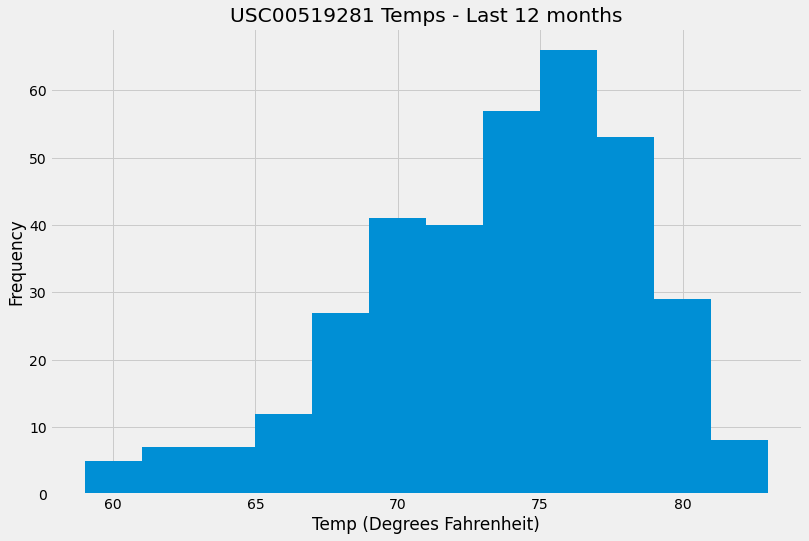

In [33]:
# Plot the results as a histogram

USC00519281_df = pd.DataFrame(Last_year_USC00519281, columns=['Station', 'Temp_Obs'])

USC00519281_df.hist(bins=12, figsize=(12, 8))

plt.xlabel("Temp (Degrees Fahrenheit)")
plt.ylabel("Frequency")
plt.title("USC00519281 Temps - Last 12 months")

plt.savefig("USC00519281_Histogram_Last_12_months.png")
plt.show()


# Close session

In [34]:
# Close Session
session.close()